<a href="https://colab.research.google.com/github/Vijay-Wangg/project1/blob/main/malware__detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Microsoft Malware detection**

**Problem Statement**

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware.
</p>


***Importing Important useful library***

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
# matplotlib.use('nbAgg')
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize
from nltk.util import ngrams
import h5py
import copy

# Using dataset in which Byte files and asm files are already separated Since the dataset is of more than 200 gb creating space issue on google colab

**<h2>Distribution of malware classes in whole data set </h2>**

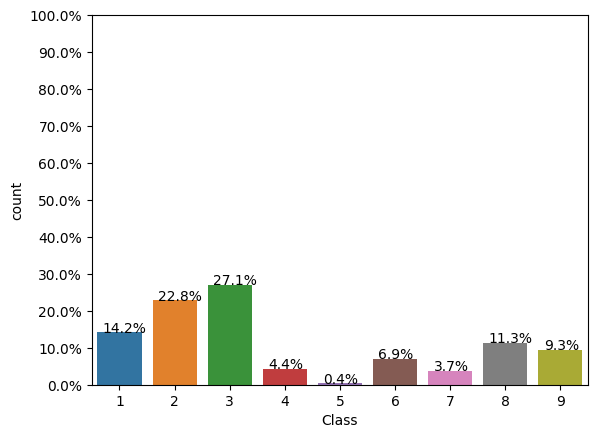

In [2]:
# close previous plot to reder new one
plt.close()
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

In [4]:
data_size_byte = pd.read_csv('data_size_byte.csv')
print (data_size_byte.head())

   Unnamed: 0                    ID      size  Class
0           0  FGCV8wbAuQp1HiSd7kvm  3.972656      7
1           1  EmVYF0ZrIBWCGL5168XH  0.644531      1
2           2  CywHbj2cUaVYgp9xhIDk  0.222656      6
3           3  eF5UtAWbwBrYJlRVpNIk  0.363281      8
4           4  5scq0VdirPRF8DxUKbh1  0.632812      9


<h3>  box plots of file size (.byte files) feature </h3>

Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. Boxplot is also used for detect the outlier in data set. It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups.

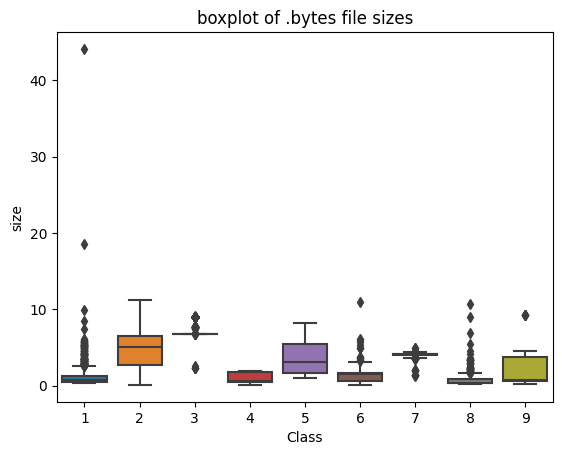

In [39]:
plt.close()
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
# print(ax)
plt.title("boxplot of .bytes file sizes")
plt.show()

Reading byte feature

In [40]:
byte_features=pd.read_csv("result.csv")
byte_features.head()

,ID,0,1,2,3,4,5,6,7,8,...,f7,f8,f9,fa,fb,fc,fd,fe,ff,??
0,01azqd4InC7m9JpocGv5.txt,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,2804.0,3687.0,3101.0,3211.0,3097.0,2758.0,3099.0,2759.0,5753.0,1824.0
1,01IsoiSMh5gxyDYTl4CB.txt,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,451.0,6536.0,439.0,281.0,302.0,7639.0,518.0,17001.0,54902.0,8588.0
2,01jsnpXSAlgw6aPeDxrU.txt,93506,9542,2568,2438,8925,9330,9007,2342,9107,...,2325.0,2358.0,2242.0,2885.0,2863.0,2471.0,2786.0,2680.0,49144.0,468.0
3,01kcPWA9K2BOxQeS5Rju.txt,21091,1213,726,817,1257,625,550,523,1078,...,478.0,873.0,485.0,462.0,516.0,1133.0,471.0,761.0,7998.0,13940.0
4,01SuzwMJEIXsK7A8dQbl.txt,19764,710,302,433,559,410,262,249,422,...,847.0,947.0,350.0,209.0,239.0,653.0,221.0,242.0,2199.0,9008.0


removing .txt from ID

In [41]:
byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features.head(2)

,ID,0,1,2,3,4,5,6,7,8,...,f7,f8,f9,fa,fb,fc,fd,fe,ff,??
0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,2804.0,3687.0,3101.0,3211.0,3097.0,2758.0,3099.0,2759.0,5753.0,1824.0
1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,451.0,6536.0,439.0,281.0,302.0,7639.0,518.0,17001.0,54902.0,8588.0


In [42]:
data_size_byte.head()

,Unnamed: 0,ID,size,Class
0,0,FGCV8wbAuQp1HiSd7kvm,3.972656,7
1,1,EmVYF0ZrIBWCGL5168XH,0.644531,1
2,2,CywHbj2cUaVYgp9xhIDk,0.222656,6
3,3,eF5UtAWbwBrYJlRVpNIk,0.363281,8
4,4,5scq0VdirPRF8DxUKbh1,0.632812,9


In [43]:
byte_features_with_size = byte_features.merge(data_size_byte, on='ID')
byte_features_with_size.to_csv("result_with_size.csv")
byte_features_with_size.head()

,ID,0,1,2,3,4,5,6,7,8,...,fa,fb,fc,fd,fe,ff,??,Unnamed: 0,size,Class
0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,3211.0,3097.0,2758.0,3099.0,2759.0,5753.0,1824.0,9078,4.148438,9
1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,281.0,302.0,7639.0,518.0,17001.0,54902.0,8588.0,7482,5.425781,2
2,01jsnpXSAlgw6aPeDxrU,93506,9542,2568,2438,8925,9330,9007,2342,9107,...,2885.0,2863.0,2471.0,2786.0,2680.0,49144.0,468.0,5134,3.808594,9
3,01kcPWA9K2BOxQeS5Rju,21091,1213,726,817,1257,625,550,523,1078,...,462.0,516.0,1133.0,471.0,761.0,7998.0,13940.0,10119,0.562500,1
4,01SuzwMJEIXsK7A8dQbl,19764,710,302,433,559,410,262,249,422,...,209.0,239.0,653.0,221.0,242.0,2199.0,9008.0,10764,0.363281,8


<h2> Normalization<h2>

In [44]:

def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(byte_features_with_size)

In [45]:
result.head()

,ID,0,1,2,3,4,5,6,7,8,...,fa,fb,fc,fd,fe,ff,??,Unnamed: 0,size,Class
0,01azqd4InC7m9JpocGv5,0.527809,0.010377,0.002647,0.007398,0.002048,0.001835,0.002058,0.007595,0.003511,...,0.014906,0.014457,0.031724,0.017554,0.014348,0.019530,0.000752,0.835389,0.364407,9
1,01IsoiSMh5gxyDYTl4CB,0.034861,0.022155,0.006813,0.013873,0.005303,0.003873,0.004747,0.018007,0.011003,...,0.001304,0.001410,0.087867,0.002934,0.088414,0.186374,0.003540,0.688455,0.479873,2
2,01jsnpXSAlgw6aPeDxrU,0.081995,0.025357,0.002414,0.004707,0.005464,0.005280,0.005078,0.005557,0.010785,...,0.013393,0.013365,0.028423,0.015781,0.013937,0.166828,0.000193,0.472289,0.333686,9
3,01kcPWA9K2BOxQeS5Rju,0.018495,0.003223,0.000682,0.001577,0.000770,0.000354,0.000310,0.001241,0.001277,...,0.002145,0.002409,0.013032,0.002668,0.003958,0.027151,0.005746,0.931228,0.040254,1
4,01SuzwMJEIXsK7A8dQbl,0.017331,0.001887,0.000284,0.000836,0.000342,0.000232,0.000148,0.000591,0.000500,...,0.000970,0.001116,0.007511,0.001252,0.001259,0.007465,0.003713,0.990609,0.022246,8


In [47]:
result.isnull().sum()

ID            0
0             0
1             0
2             0
3             0
             ..
ff            1
??            1
Unnamed: 0    0
size          0
Class         0
Length: 261, dtype: int64

Dropping the Null Values

In [48]:
result=result.dropna()

Storing category in separately

In [50]:

data_y = result['Class']
data_y.head()

0    9
1    2
2    9
3    1
4    8
Name: Class, dtype: int64

<h2> Multivariate Analysis </h2>

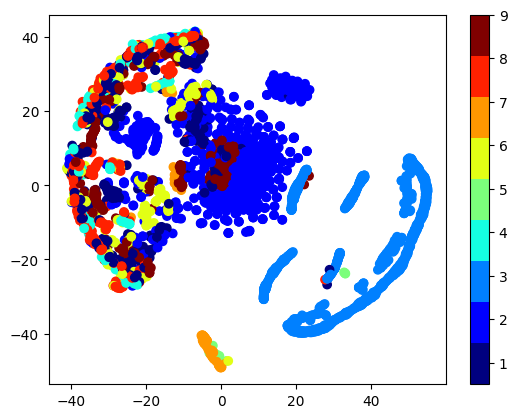

In [51]:
plt.close()
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

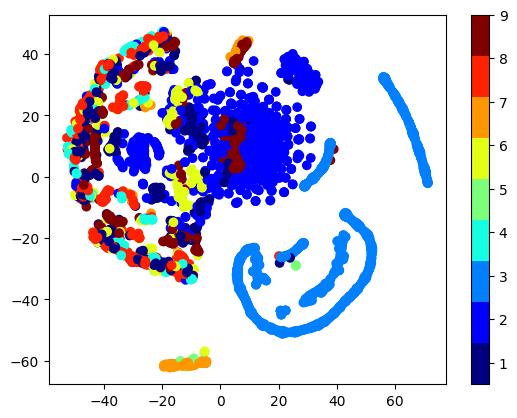

In [52]:
plt.close()
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

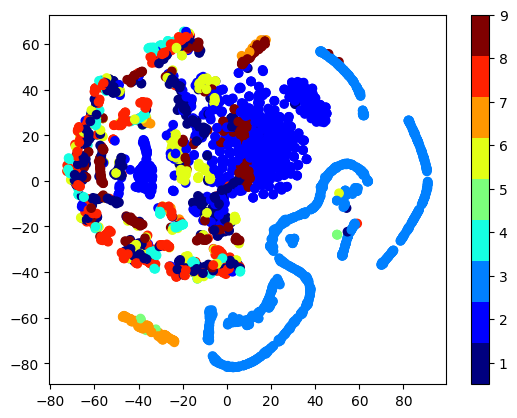

In [53]:
plt.close()
#this is with perplexity 15
xtsne=TSNE(perplexity=15)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

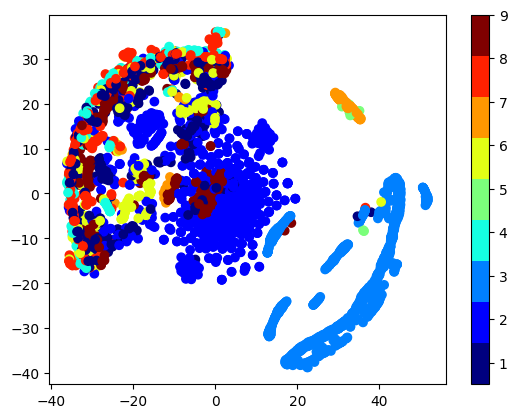

In [54]:
plt.close()
#this is with perplexity 70
xtsne=TSNE(perplexity=70)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [55]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [56]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 2265
Number of data points in test data: 709
Number of data points in cross validation data: 567


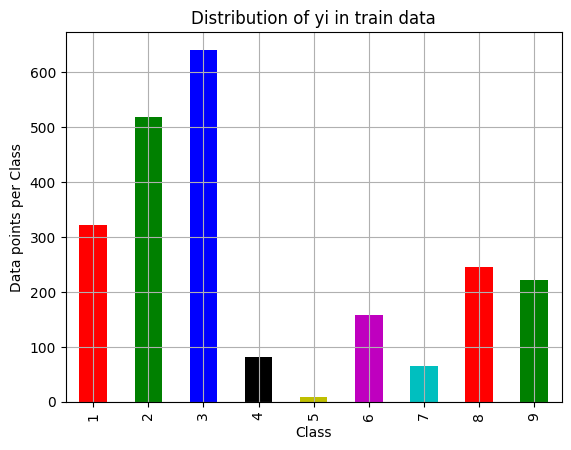

Number of data points in class 3 : 641 ( 28.3 %)
Number of data points in class 2 : 518 ( 22.87 %)
Number of data points in class 1 : 322 ( 14.216 %)
Number of data points in class 8 : 246 ( 10.861 %)
Number of data points in class 9 : 222 ( 9.801 %)
Number of data points in class 6 : 159 ( 7.02 %)
Number of data points in class 4 : 82 ( 3.62 %)
Number of data points in class 7 : 66 ( 2.914 %)
Number of data points in class 5 : 9 ( 0.397 %)


In [57]:
plt.close()
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sort_index()#sortlevel()
test_class_distribution = y_test.value_counts().sort_index()#.sortlevel()
cv_class_distribution = y_cv.value_counts().sort_index()#.sortlevel()

# my_colors = 'rgbkymc'
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  # red, green, blue, black, etc.
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

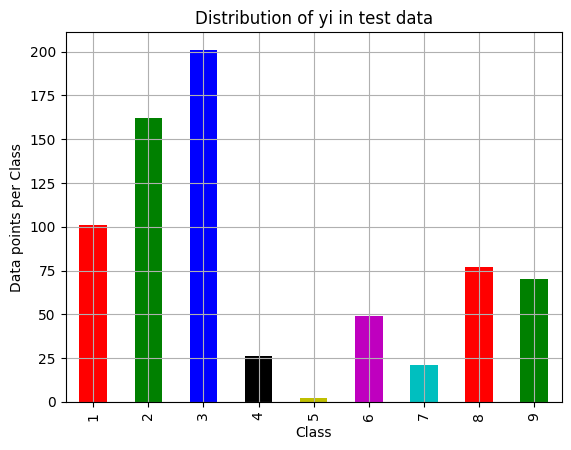

--------------------------------------------------------------------------------
Number of data points in class 3 : 201 ( 28.35 %)
Number of data points in class 2 : 162 ( 22.849 %)
Number of data points in class 1 : 101 ( 14.245 %)
Number of data points in class 8 : 77 ( 10.86 %)
Number of data points in class 9 : 70 ( 9.873 %)
Number of data points in class 6 : 49 ( 6.911 %)
Number of data points in class 4 : 26 ( 3.667 %)
Number of data points in class 7 : 21 ( 2.962 %)
Number of data points in class 5 : 2 ( 0.282 %)


In [58]:
plt.close()
# my_colors = 'rgbkymc'
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  # red, green, blue, black, etc.
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

print('-'*80)
# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

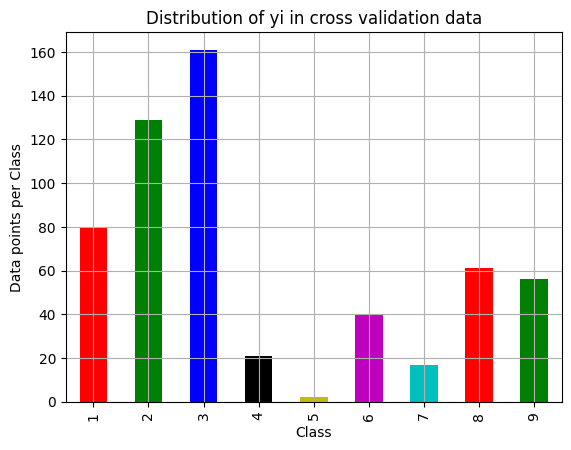

--------------------------------------------------------------------------------
Number of data points in class 3 : 161 ( 28.395 %)
Number of data points in class 2 : 129 ( 22.751 %)
Number of data points in class 1 : 80 ( 14.109 %)
Number of data points in class 8 : 61 ( 10.758 %)
Number of data points in class 9 : 56 ( 9.877 %)
Number of data points in class 6 : 40 ( 7.055 %)
Number of data points in class 4 : 21 ( 3.704 %)
Number of data points in class 7 : 17 ( 2.998 %)
Number of data points in class 5 : 2 ( 0.353 %)


In [59]:
plt.close()
# my_colors = 'rgbkymc'
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']  # red, green, blue, black, etc.
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

print('-'*80)
# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')

In [61]:
plt.close()
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j

    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column

    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1

    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]]

    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))

    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

**<h1> Machine Learning Models</h1>**

<h2> Machine Leaning Models on bytes files</h2>

<h3>Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.508107972899032
Log loss on Test Data using Random Model 2.4992724045405645
Number of misclassified points  88.15232722143864
-------------------------------------------------- Confusion matrix --------------------------------------------------


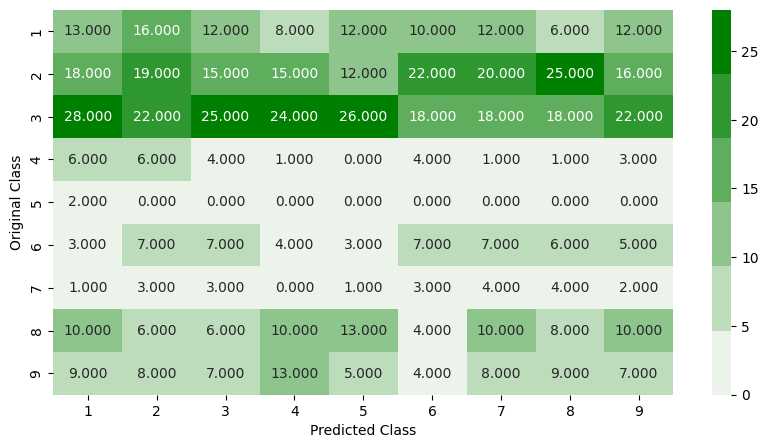

-------------------------------------------------- Precision matrix --------------------------------------------------


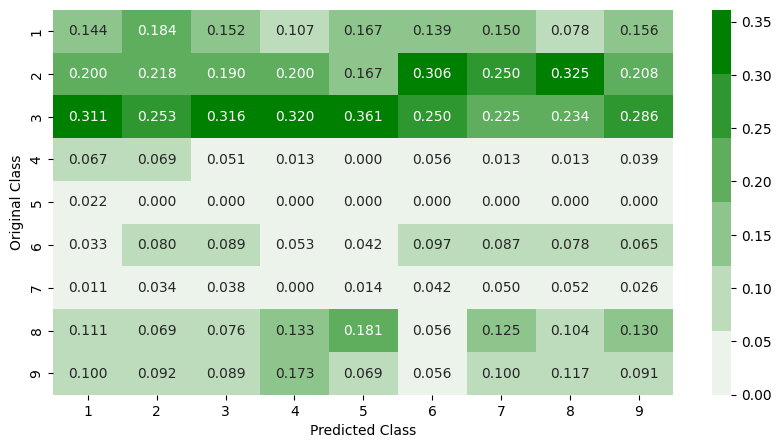

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


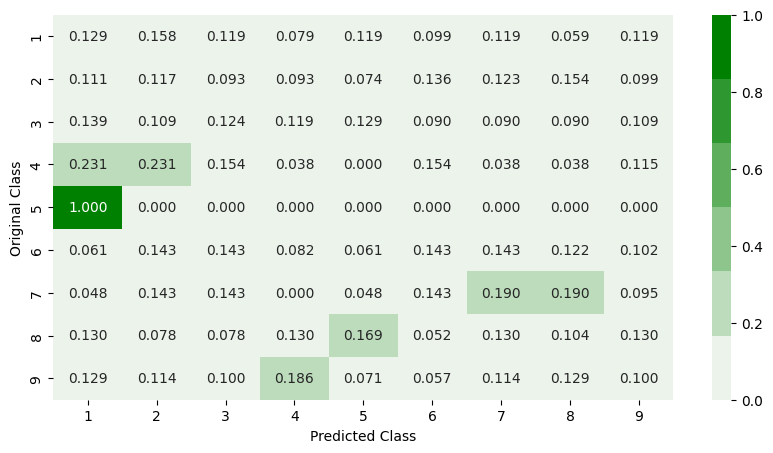

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [62]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)



**<h2> K Nearest Neighbour Classification</h2>**

log_loss for k =  1 is 0.6517313808570782
log_loss for k =  3 is 0.6055451970735543
log_loss for k =  5 is 0.6000038674024204
log_loss for k =  7 is 0.604800469062484
log_loss for k =  9 is 0.6070029552170079
log_loss for k =  11 is 0.6259012739287337
log_loss for k =  13 is 0.638148571745716


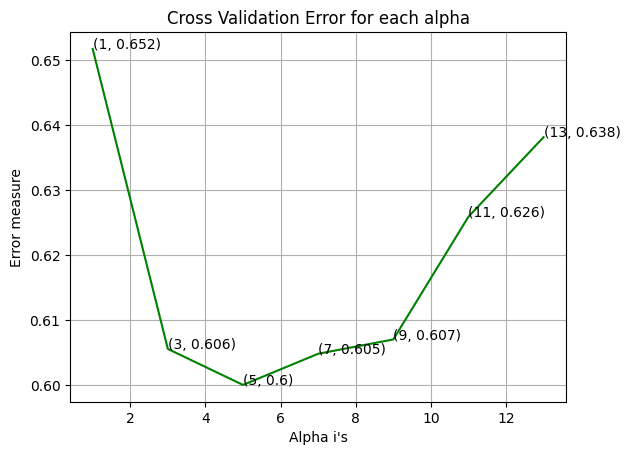

CPU times: user 8.95 s, sys: 139 ms, total: 9.09 s
Wall time: 9.81 s


In [63]:
%%time
plt.close()

alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

For values of best alpha =  5 The train log loss is: 0.408816699452722
For values of best alpha =  5 The cross validation log loss is: 0.6000038674024204
For values of best alpha =  5 The test log loss is: 0.598347778527244
Number of misclassified points  16.643159379407617
-------------------------------------------------- Confusion matrix --------------------------------------------------


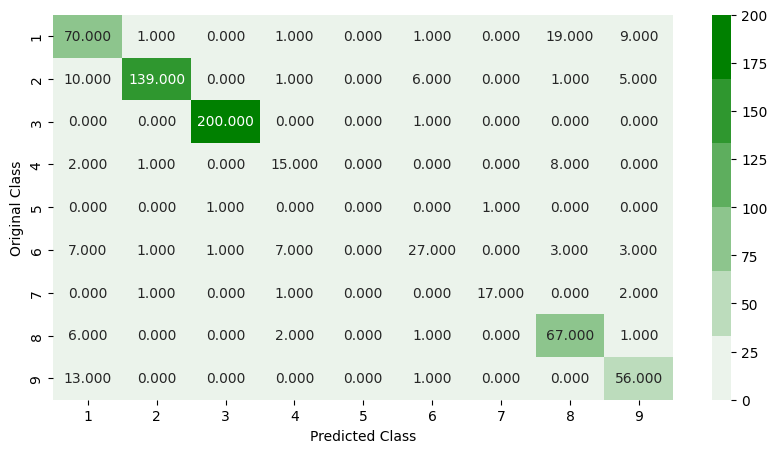

-------------------------------------------------- Precision matrix --------------------------------------------------


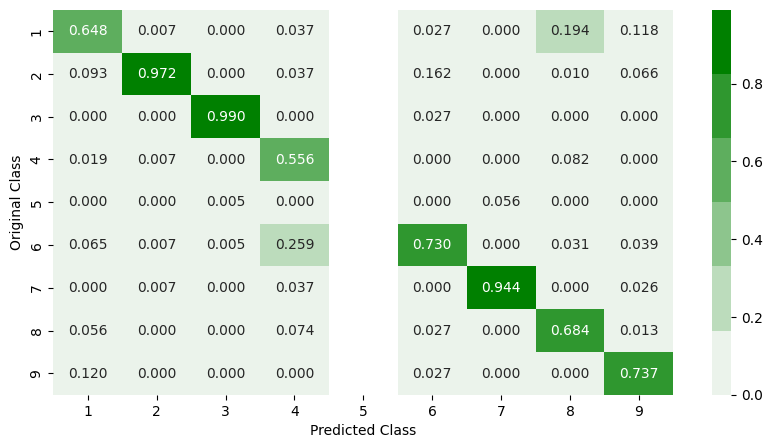

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


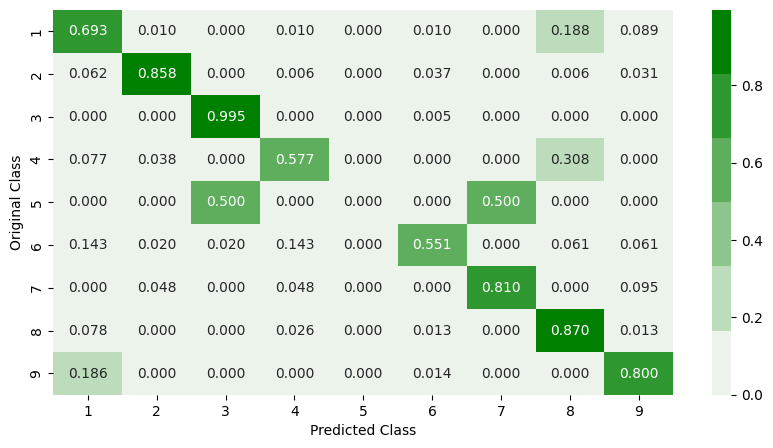

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [64]:
# %%time
plt.close()
k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))




**<h2>Logistic Regression</h2>**

log_loss for c =  1e-05 is 1.0248028952292276
log_loss for c =  0.0001 is 1.024712895171247
log_loss for c =  0.001 is 1.0235387680677441
log_loss for c =  0.01 is 1.013325650200798
log_loss for c =  0.1 is 0.9660082448699288
log_loss for c =  1 is 0.9342994942434721
log_loss for c =  10 is 0.8993887635109956
log_loss for c =  100 is 0.9603000477139804
log_loss for c =  1000 is 1.0271874567652195


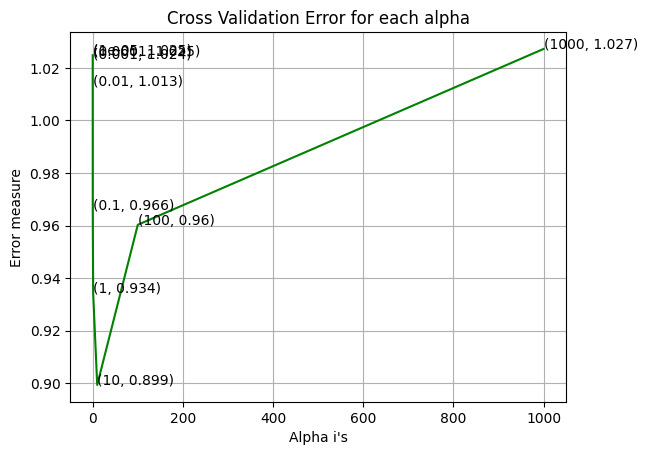

CPU times: user 22.1 s, sys: 9.3 s, total: 31.4 s
Wall time: 25.4 s


In [67]:
%%time
plt.close()


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

log loss for train data 0.8809009621533839
log loss for cv data 0.8993887635109956
log loss for test data 0.8702177666991472
Number of misclassified points  27.644569816643163
-------------------------------------------------- Confusion matrix --------------------------------------------------


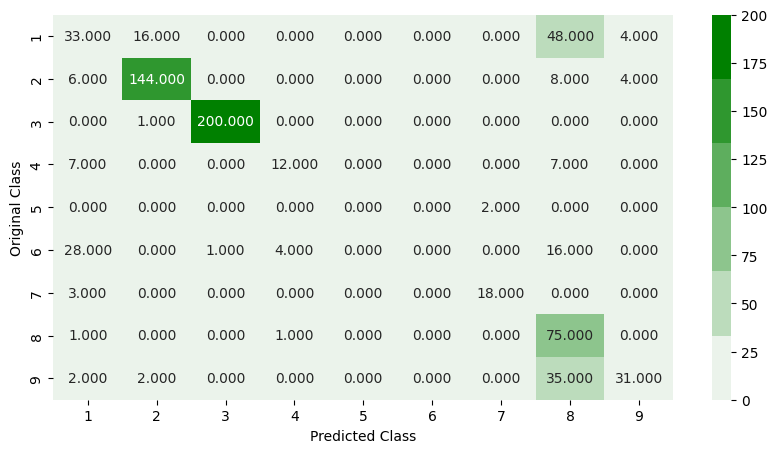

-------------------------------------------------- Precision matrix --------------------------------------------------


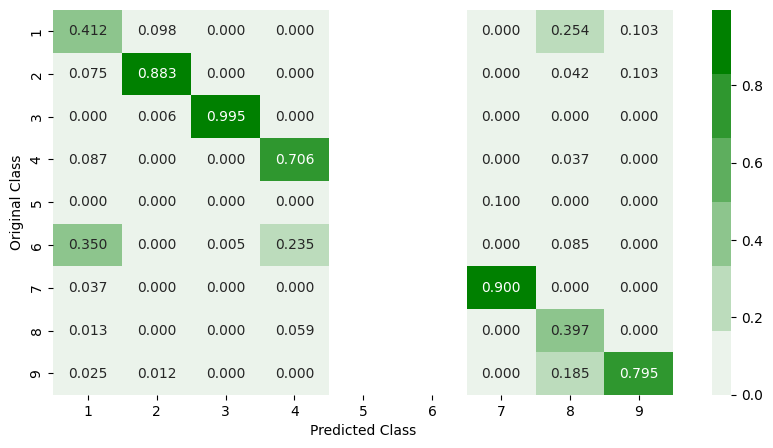

Sum of columns in precision matrix [ 1.  1.  1.  1. nan nan  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


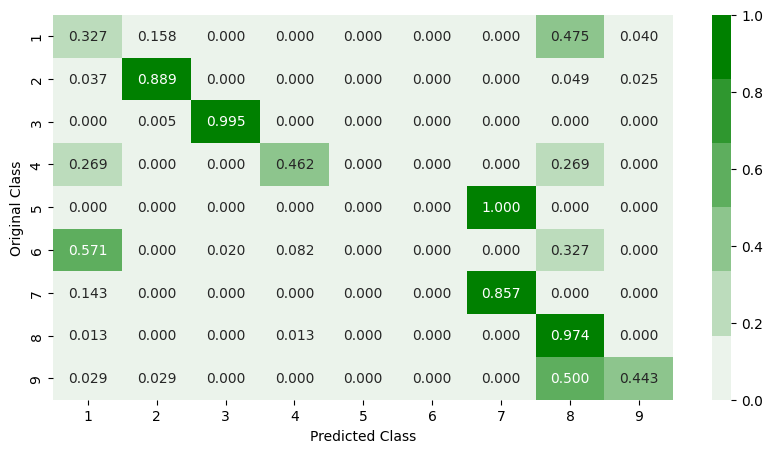

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
CPU times: user 5.81 s, sys: 1.96 s, total: 7.78 s
Wall time: 4.51 s


In [70]:
%%time
plt.close()
logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))






**<h2> Random Forest Classifier </h2>**

log_loss for c =  10 is 0.159727568588999
log_loss for c =  50 is 0.13692248376786825
log_loss for c =  100 is 0.13226007097445644
log_loss for c =  500 is 0.13105584117108765
log_loss for c =  1000 is 0.131297497732586
log_loss for c =  2000 is 0.13170808319656502
log_loss for c =  3000 is 0.1316546347529395


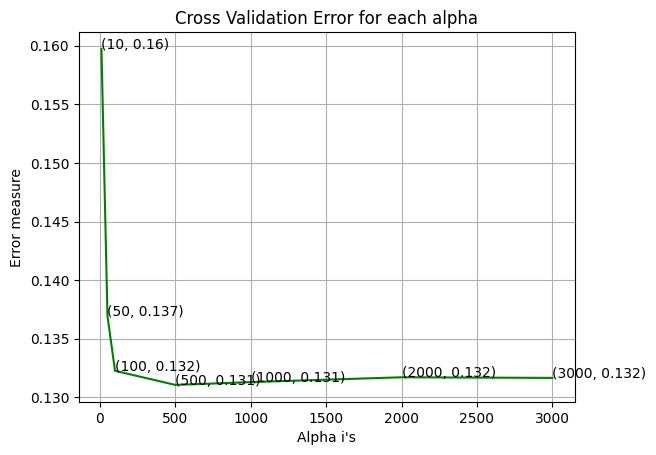

CPU times: user 16min 8s, sys: 9.98 s, total: 16min 18s
Wall time: 10min 42s


In [72]:
%%time
plt.close()


alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

For values of best alpha =  500 The train log loss is: 0.052855066810858845
For values of best alpha =  500 The cross validation log loss is: 0.13105584117108765
For values of best alpha =  500 The test log loss is: 0.13129449605512275
Number of misclassified points  2.6798307475317347
-------------------------------------------------- Confusion matrix --------------------------------------------------


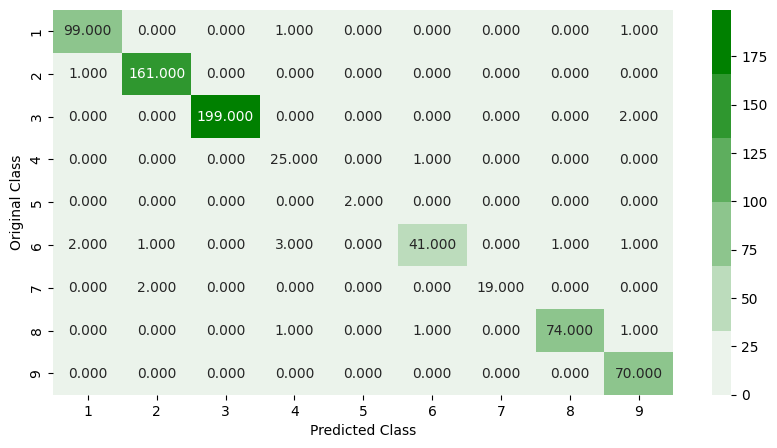

-------------------------------------------------- Precision matrix --------------------------------------------------


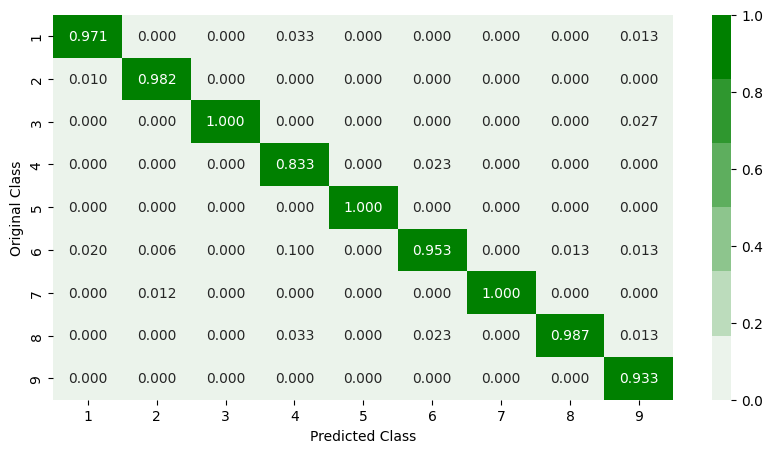

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


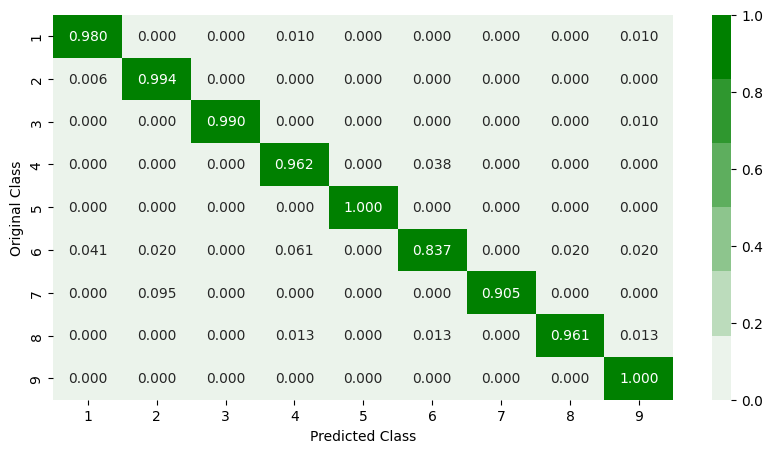

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [73]:
plt.close()
r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h1>Bytes Files Model Comparision</h1>

In [89]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = (['Model', 'Train Log Loss', 'CV Log Loss', 'Test Log Loss', 'Number of Misclassified Points'])

table.add_row(['Random Model', '-', 2.508107972899032,2.4992724045405645,88.15232722143864])
table.add_row(['K Nearest Neighbour', 0.408816699452722,0.6000038674024204,0.598347778527244,16.643159379407617])
table.add_row(['Logistic Regression', 0.8809009621533839,0.8993887635109956,0.8702177666991472,27.644569816643163])
table.add_row(['Random Forest Classifier', 0.052855066810858845, 0.13105584117108765, 0.13129449605512275, 2.6798307475317347])
print(table)

+--------------------------+----------------------+---------------------+---------------------+--------------------------------+
|          Model           |    Train Log Loss    |     CV Log Loss     |    Test Log Loss    | Number of Misclassified Points |
+--------------------------+----------------------+---------------------+---------------------+--------------------------------+
|       Random Model       |          -           |  2.508107972899032  |  2.4992724045405645 |       88.15232722143864        |
|   K Nearest Neighbour    |  0.408816699452722   |  0.6000038674024204 |  0.598347778527244  |       16.643159379407617       |
|   Logistic Regression    |  0.8809009621533839  |  0.8993887635109956 |  0.8702177666991472 |       27.644569816643163       |
| Random Forest Classifier | 0.052855066810858845 | 0.13105584117108765 | 0.13129449605512275 |       2.6798307475317347       |
+--------------------------+----------------------+---------------------+---------------------+--